## Data Exploration

In [2]:
import pandas as pd
import os
from os import listdir
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
filepaths = [[f for f in listdir("data") if f.endswith('.csv')]]
filepaths[0]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [4]:
#books_df=pd.concat(map(pd.read_csv, filepaths[0]))
#books_df=pd.concat(map(pd.read_csv,['data/books_df_280.csv','data/books_df_480.csv']))

books_df=pd.read_csv('books_df_all.csv')

In [5]:
books_df.head()

,authors,category/genre,description,id_book,image_url,isbn,language,num_pages,published_date,publisher,reviews,sub_category,title,ratings_count,reviews_count,text_reviews_count,average_rating
0,['Stacey Joy Netzel'],Fiction,Kendra Zelner has three brothers: Eight-year o...,JbKjAwAAQBAJ,http://books.google.com/books/content?id=JbKjA...,9781939143228,en,NaN,,Stacey Joy Netzel,"{'ratings_count': 167, 'reviews_count': 352, '...",contemporary-romance,Trust in the Lawe (Colorado Trust Series - 3),167,352,19,4.17
1,['Stephen King'],Fiction,Returns to the rich landscape of Mid-World in ...,Nvkwjw2LToEC,http://books.google.com/books/content?id=Nvkwj...,9781451658903,en,309.0,,Simon and Schuster,"{'ratings_count': 62949, 'reviews_count': 1306...",fantasy,The Wind Through the Keyhole,62949,130610,5030,4.15
2,['Jill McCorkle'],Fiction,Jo Spencer's conventional life is disrupted wh...,ouTaAnG0ipwC,http://books.google.com/books/content?id=ouTaA...,9781565120013,en,400.0,,Algonquin Books,"{'ratings_count': 473, 'reviews_count': 884, '...",fiction,The Cheer Leader,473,884,36,3.71
3,['Jules Verne'],Fiction,Jules Verne: Die Kinder des Kapitän Grant. All...,ekDTBgAAQBAJ,http://books.google.com/books/content?id=ekDTB...,9783843030885,de,538.0,,BoD – Books on Demand,"{'ratings_count': 9954, 'reviews_count': 17743...",adventure,Die Kinder des Kapitän Grant,9954,17743,224,4.08
4,['Cathy Gillen Thacker'],Fiction,"With a busy career and three kids to feed, sin...",BtMwEKkGwowC,http://books.google.com/books/content?id=BtMwE...,9781426841453,en,224.0,,Harlequin,"{'ratings_count': 70, 'reviews_count': 177, 't...",hoopla,A Baby for Mommy,70,177,9,3.51


In [6]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 17 columns):
authors               1368 non-null object
category/genre        1368 non-null object
description           1368 non-null object
id_book               1368 non-null object
image_url             1368 non-null object
isbn                  1368 non-null object
language              1368 non-null object
num_pages             1169 non-null float64
published_date        1368 non-null object
publisher             1368 non-null object
reviews               1368 non-null object
sub_category          1368 non-null object
title                 1368 non-null object
ratings_count         1368 non-null int64
reviews_count         1368 non-null int64
text_reviews_count    1368 non-null int64
average_rating        1368 non-null float64
dtypes: float64(2), int64(3), object(12)
memory usage: 181.8+ KB


In [7]:
books_df.nunique()

authors               1185
category/genre         146
description           1347
id_book               1362
image_url             1347
isbn                  1362
language                10
num_pages              417
published_date           1
publisher              491
reviews               1359
sub_category           304
title                 1348
ratings_count          925
reviews_count         1112
text_reviews_count     557
average_rating         173
dtype: int64

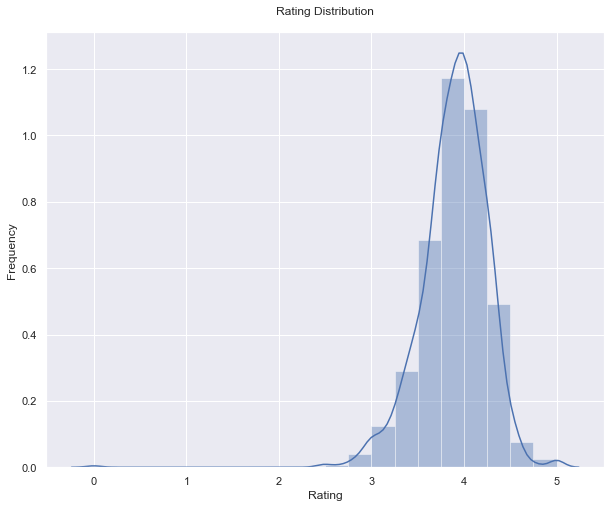

In [41]:
# ratings distribution
sns.set_context('paper')
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
#sns.kdeplot(books_df['average_rating'].astype(float), shade = True)
rating= books_df.average_rating.astype(float)
sns.distplot(rating, bins=20)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig("../static/img/visuals/Rating_dist.jpg")

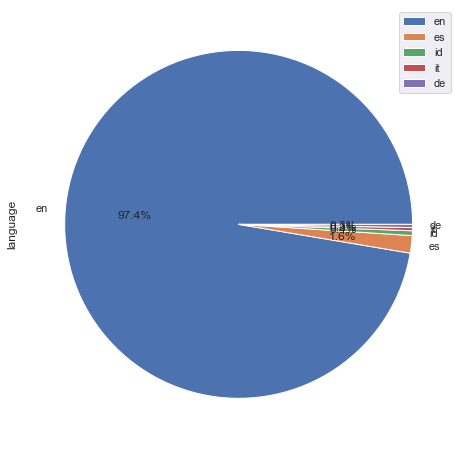

In [19]:
# top 5 languages
plt.figure(figsize=(10,8))
books_df['language'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%').legend()
plt.savefig("../static/img/visuals/lang.jpg")

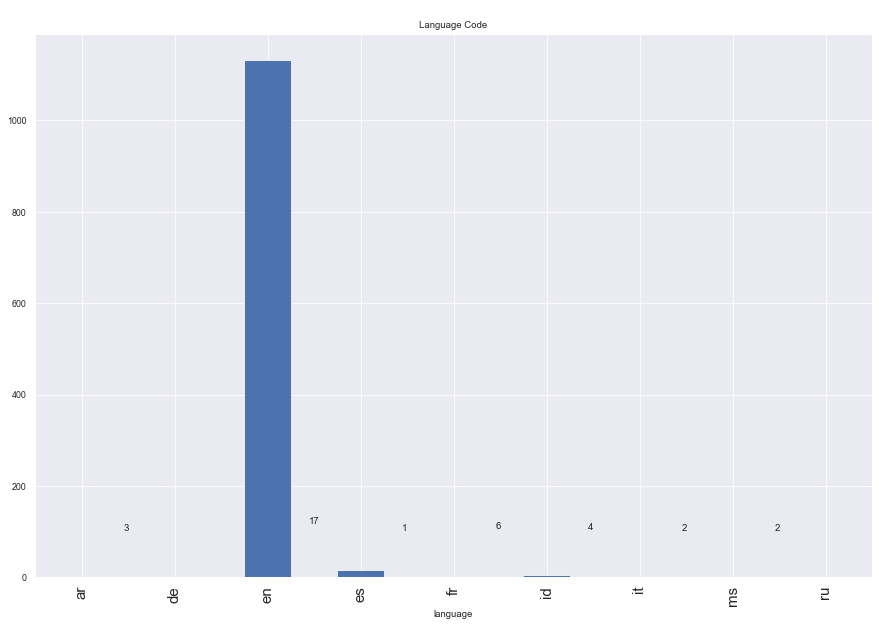

In [44]:
# top languages
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = books_df.groupby('language')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
plt.savefig("../static/img/visuals/lang2.jpg")

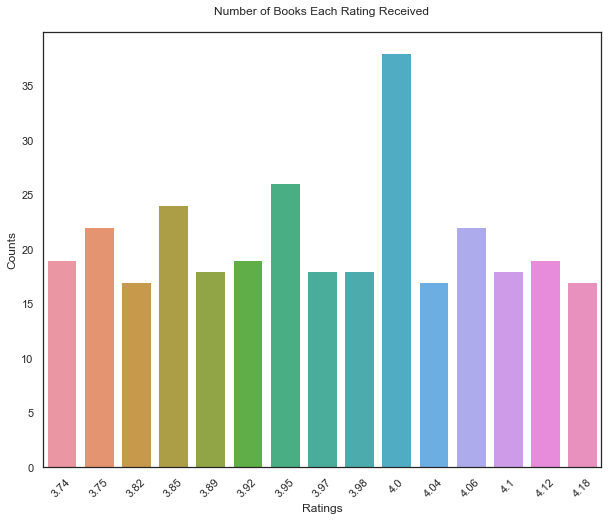

In [22]:
# number of books per rating
sns.set(style='white')
plt.figure(figsize=(10,8))
sns.barplot(books_df['average_rating'].value_counts().head(15).index, books_df['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.savefig("../static/img/visuals/book_rating.jpg")

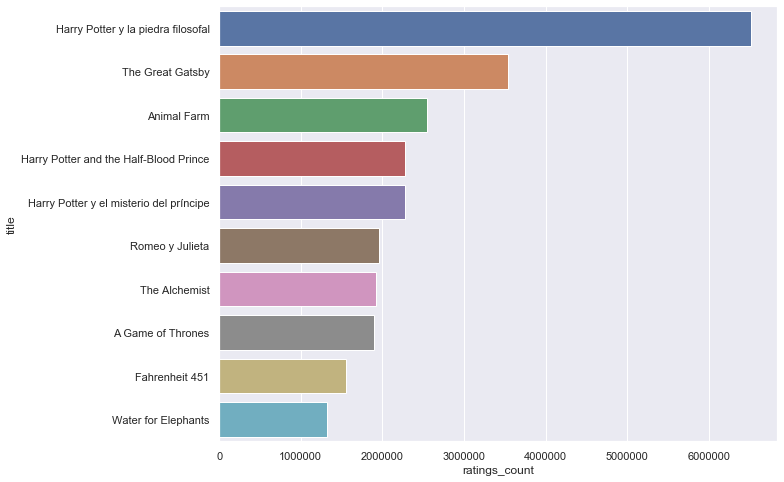

In [24]:
# highest rated books
sns.set_context('paper')
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
popular_books = books_df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)
plt.savefig("../static/img/visuals/popular_book.jpg")

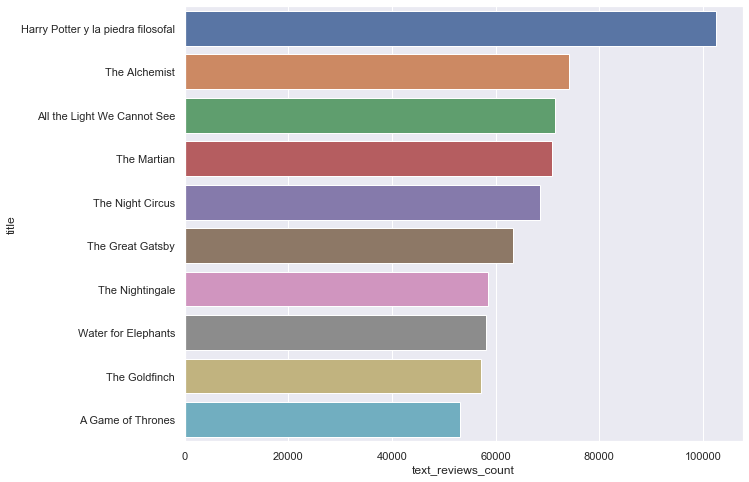

In [25]:
# highest reviewed books
sns.set_context('paper')
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
highest_reviews = books_df.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])
plt.savefig("../static/img/visuals/most_reviewed_book.jpg")

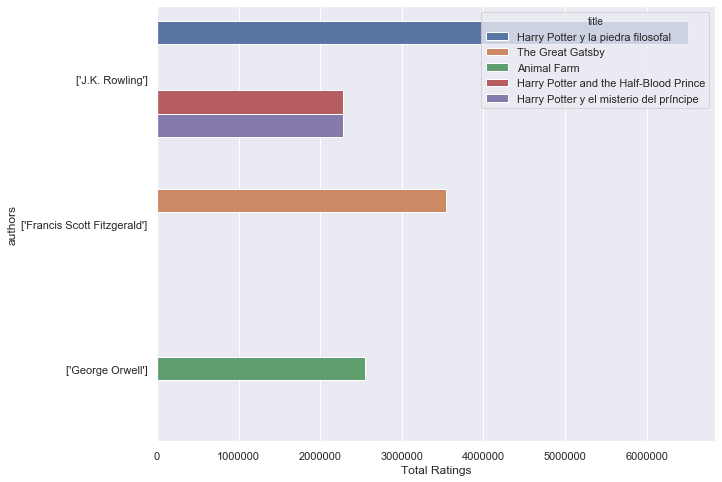

In [26]:
# authors with highest rated books
sns.set_context('paper')
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
authors = books_df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')
plt.savefig("../static/img/visuals/author_top_books.jpg")

<Figure size 1440x1080 with 0 Axes>

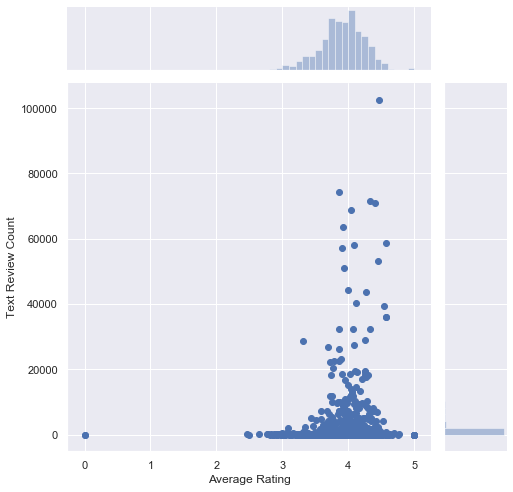

<Figure size 432x288 with 0 Axes>

In [30]:
#Relationship between Rating and Text Reviews
sns.set_context('paper')
sns.set(style='darkgrid')
plt.figure(figsize=(20,15))
#df.dropna(0, inplace=True)
sns.set_context('paper')
sns.set(style='darkgrid')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  
                  data= books_df[['text_reviews_count', 'average_rating']], height=7)
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()
plt.savefig("../static/img/visuals/rating_textreview.jpg")

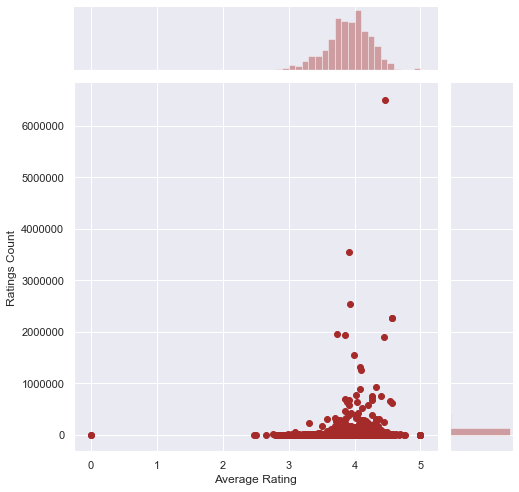

In [33]:
sns.set_context('paper')
sns.set(style='darkgrid')
ax = sns.jointplot(x="average_rating", y='ratings_count', data= books_df[['ratings_count', 'average_rating']], 
                   color = 'brown',height=7)
ax.set_axis_labels("Average Rating", "Ratings Count")
plt.savefig("../static/img/visuals/rating_rating_count.jpg")

<Figure size 1080x720 with 0 Axes>

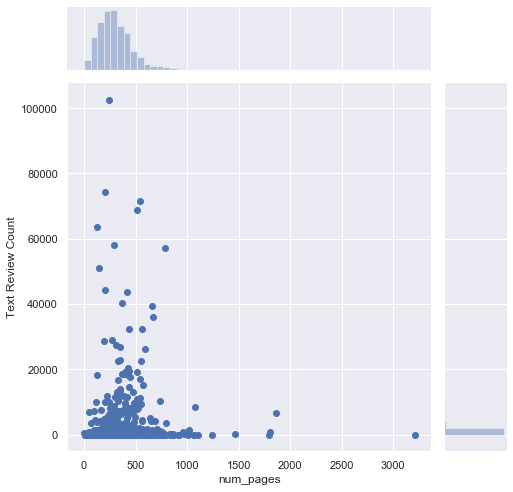

<Figure size 432x288 with 0 Axes>

In [37]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
books_df.dropna(0, inplace=True)
sns.set_context('paper')
sns.set(style='darkgrid')
ax =sns.jointplot(x="num_pages",y='text_reviews_count', kind='scatter',  data= books_df[['text_reviews_count', 'num_pages']],
                 height=7)
ax.set_axis_labels("num_pages", "Text Review Count")
plt.show()
plt.savefig("../static/img/visuals/page_review_count.jpg")

<Figure size 1080x720 with 0 Axes>

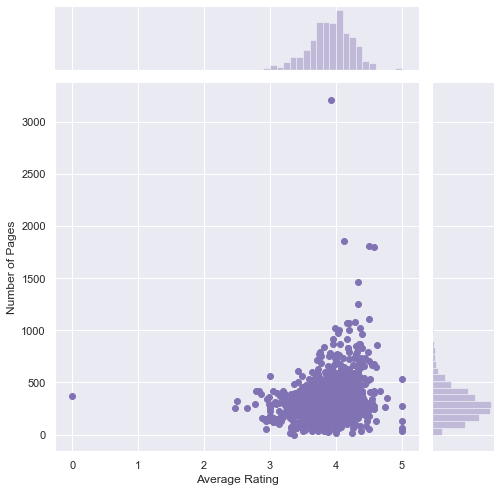

In [34]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
sns.set(style='darkgrid')
ax = sns.jointplot(x="average_rating", y="num_pages",kind='scatter',
                   data = books_df[['average_rating','num_pages']], color = 'm', height=7)
ax.set_axis_labels("Average Rating", "Number of Pages")
plt.savefig("../static/img/visuals/rating_num_pages.jpg")

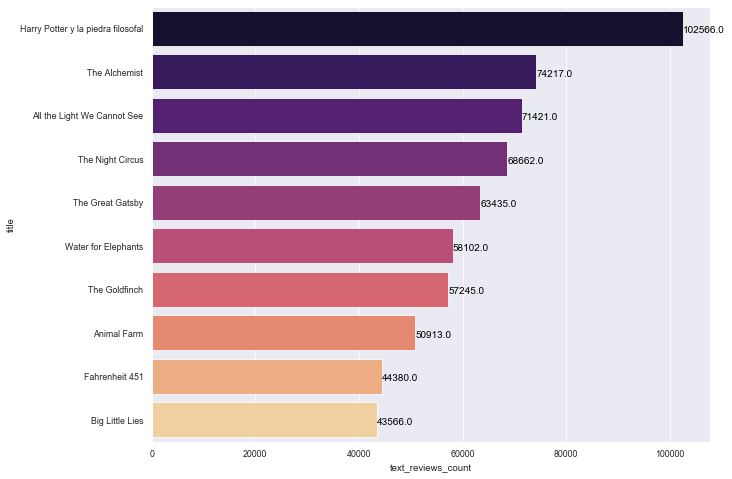

<Figure size 432x288 with 0 Axes>

In [49]:
most_text = books_df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(10,8))
sns.set_context('paper')
ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()

plt.savefig("../static/img/visuals/rating_num_pages.jpg")

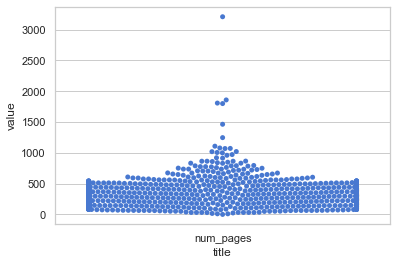

In [18]:
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
#iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
books = pd.melt(books_df, id_vars="category/genre",value_vars="num_pages", var_name="title")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="title",y='value',
              data=books)

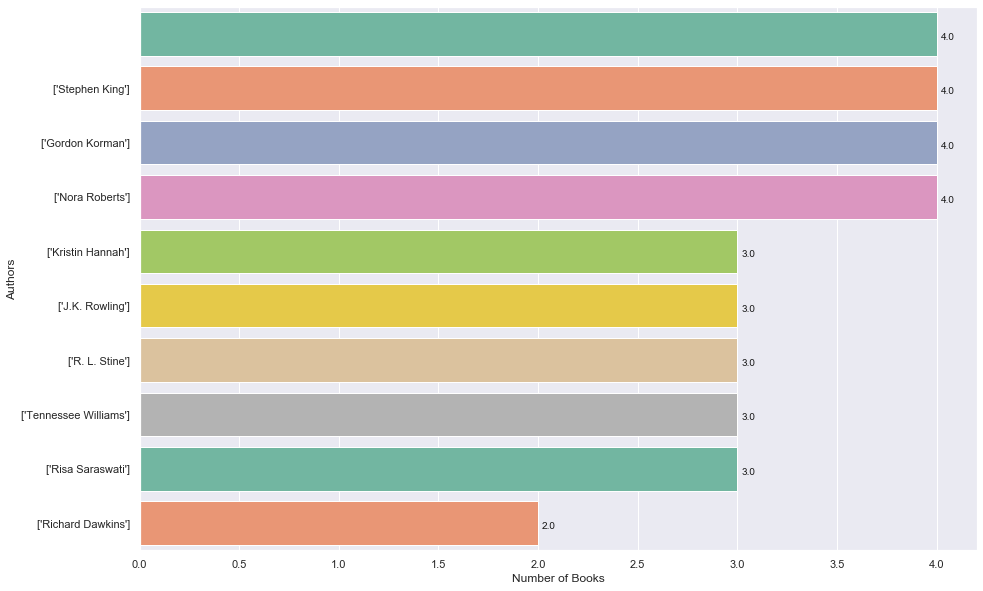

In [39]:
sns.set(style='darkgrid')
high_rated_author = books_df[books_df['average_rating']>=4]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.02, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')
plt.savefig("../static/img/visuals/author_books_rating.jpg")